# Tech Blues Capstone
## First Draft Notebook

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import wrangle
import explore
import tyler_explore

## Project Overview

## Project Planning

## Data Acquisition

In [2]:
# use our 'get_survey_data' function to bring in the data
df = wrangle.get_survey_data('survey.csv')

----------------------------------------------------
DataFrame Head
   Unnamed: 0            Timestamp  Age  Gender        Country state  \
0           0  2014-08-27 11:29:31   37  Female  United States    IL   
1           1  2014-08-27 11:29:37   44       M  United States    IN   
2           2  2014-08-27 11:29:44   32    Male         Canada   NaN   

  self_employed family_history treatment work_interfere  ...  \
0           NaN             No       Yes          Often  ...   
1           NaN             No        No         Rarely  ...   
2           NaN             No        No         Rarely  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some o

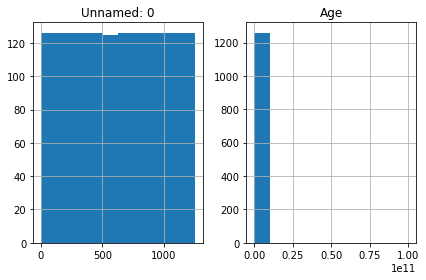

In [3]:
# Using summarize function to see head of dataframe, datatypes, amount of null values, stats, and value_counts
wrangle.summarize(df)

------

# Acquire Key Findings, Takeaways, and Next Steps:
- Good amount of nulls to drop or fill in 
- Choose to change some of the object datatypes to numeric datatype, decide what to drop, or decide what to use in modeling
- columns to encode to numeric datatype: gender, Country, self_employed, family history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys-health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence
- drop unnecassary columns: state and comments




------

## Data Preparation

In [4]:
# initial prep for object data
strings_df = wrangle.prep_the_strings(df)
strings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   unnamed: 0                 957 non-null    int64         
 1   timestamp                  957 non-null    datetime64[ns]
 2   age                        957 non-null    int64         
 3   gender                     957 non-null    object        
 4   country                    957 non-null    object        
 5   self_employed              957 non-null    object        
 6   family_history             957 non-null    object        
 7   treatment                  957 non-null    object        
 8   work_interfere             957 non-null    object        
 9   no_employees               957 non-null    object        
 10  remote_work                957 non-null    object        
 11  tech_company               957 non-null    object        
 12  benefit

In [5]:
# initial prep for encoding objects into integers
encoded_df = wrangle.prep_encode(strings_df)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   unnamed: 0                 957 non-null    int64         
 1   timestamp                  957 non-null    datetime64[ns]
 2   age                        957 non-null    int64         
 3   gender                     957 non-null    int64         
 4   country                    957 non-null    object        
 5   self_employed              957 non-null    int64         
 6   family_history             957 non-null    int64         
 7   treatment                  957 non-null    int64         
 8   work_interfere             957 non-null    int64         
 9   company_size               957 non-null    int64         
 10  remote_work                957 non-null    int64         
 11  tech_company               957 non-null    int64         
 12  benefit

**To prep this data before exploration, the following was done:**

|   Feature      | Description    | Encoding |
| :------------- | ----------- | -----------: |
| timestamp	|  Time survey was submitted | - |
| age	| Respondent age  | - |
| gender	| Respondent gender | male:0, female:1, other:2 |
| country	 |  Respondent survey  | Only kept N America and Europe |
| self_employed	 | Whether or not they were self employed | No:0, Yes:1 |
| family_history	| Whether or not they have a family history of mental illness | No:0, Yes:1 |
| treatment	 |  Whether or not they have sought treatment  | No:0, Yes:1 |
|  work_interfere	  |  If the person felt that the mental condition interfered with work | Never:0, Rarely:1, Sometimes:2, Often:3, NA:4 |
| no_employees	| The number of employees in the company or organization  | <5:0, 6-25:1, 26-100:2, 101-500:3, 501-1000:4, >1000:5 |
| remote_work	 | Having remote work (outside of an office) at least 50% of the time | No:0, Yes:1 |
| tech_company	| The employer is primarily a tech company/organization | No:0, Yes:1 |
| benefits  |	Providing mental health benefits by the employer | No:0, Yes:1, Don't know:2 |
| care_options |	Providing options for mental health care by the employer | No:0, Yes:1, Not sure:2 |
| wellness_program	| Discussion about mental health as part of an employee wellness program by the employees | No:0, Yes:1, Don't know:2 |
| seek_help	| Provided resources by the employer to learn more about mental health issues and how to seek help | No:0, Yes:1, Don't know:2 |
| anonymity |	Protecting anonymity if you choose to take advantage of mental health or substance abuse treatment resources | No:0, Yes:1, Don't know:2 |
| leave  |	How easy is it for you to take medical leave for a mental health condition? | Very difficult:0, Somewhat difficult:1, Don't know:2, Somewhat easy:3, Very easy:4 |
| mental-health_consequence |	Having negative consequences caused by discussing a mental health issue with your employer | No:0, Yes:1, Maybe:2 |
| phys-health_consequence	 | Having negative consequences caused by discussing a physical health issue with your employer  | No:0, Yes:1, Maybe:2 |
| coworkers |	Would you be willing to discuss a mental health issue with your coworkers? | No:0, Yes:1, Some of them:2 |
| supervisor	| Would you be willing to discuss a mental health issue with your direct supervisor(s)? | No:0, Yes:1, Some of them:2 |
| mental_health_interview  |	Would you bring up a mental health issue with a potential employer in an interview?  | No:0, Yes:1, Maybe:2 |
| phys_health_interview |	Would you bring up a physical health issue with a potential employer in an interview?  | No:0, Yes:1, Maybe:2 |
| mental_vs_physical |	Do you feel that your employer takes mental health as seriously as physical health? | No:0, Yes:1, Don't know:2 |
|  obs_consequence  |  Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  | No:0, Yes:1 |

------

### Data Preparation Key Findings, Takeaways, and Next Steps:

- Chose to only include North America and Europe in our dataset: The economic status in these two countries are similar and this will give us more controlled variables with less bias in the data.
- The cleaning process had a moderate amount of nulls that needed to filled in or dropped 
- Deciding on what to fill nulls for each column was dependent on the column we were dealing with as you can see in the cell above.
- Initially decided to not one hot encode: will decide which columns to one hot encode once we find what features are drivers and what features are not.

------

## Data Exploration
### 1st Iteration
The first iteration will be performed on encoded data, before deciding which variables to one-hot encode before the second iteration of data exploration.

### Univariate

In [6]:
# first let's split the data...

# encoded data
encoded_train, encoded_validate, encoded_test = explore.three_split(encoded_df, 'work_interfere')

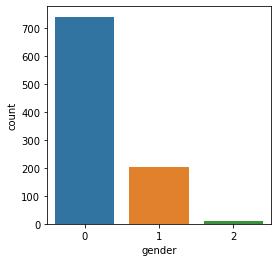

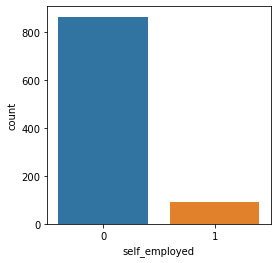

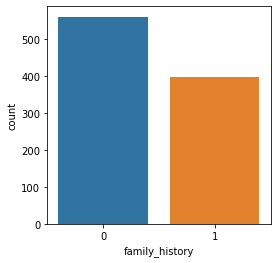

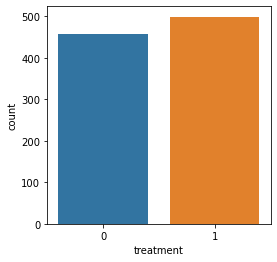

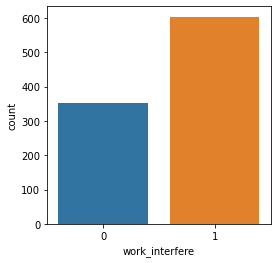

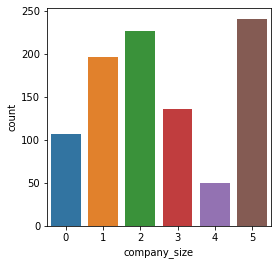

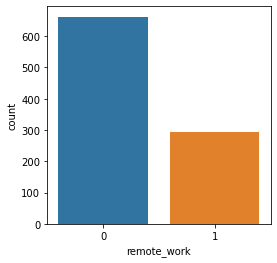

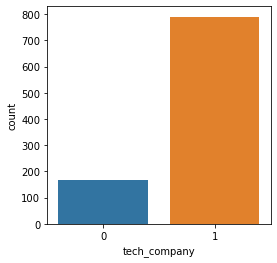

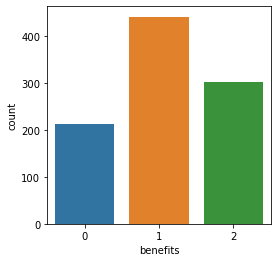

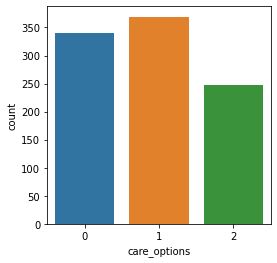

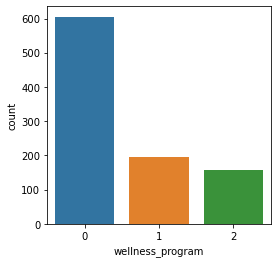

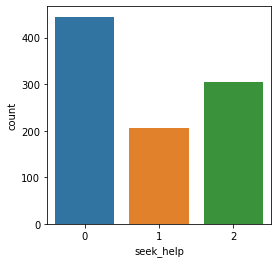

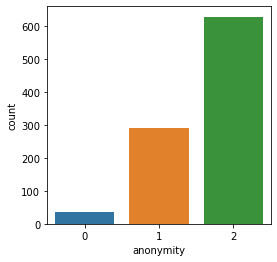

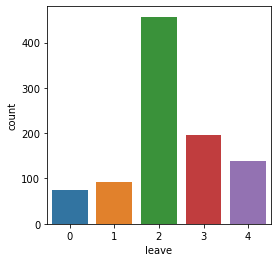

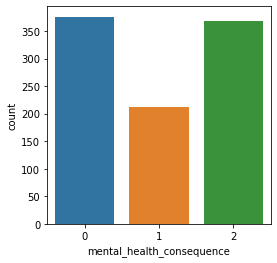

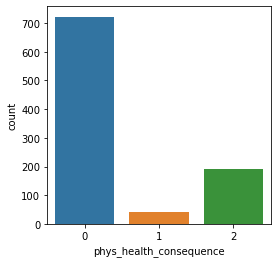

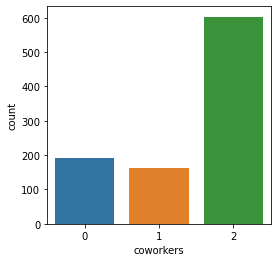

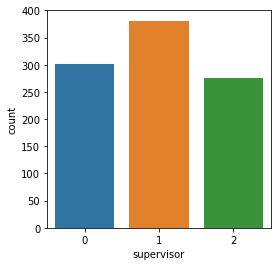

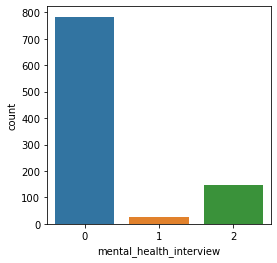

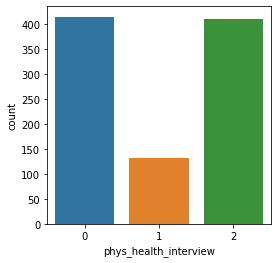

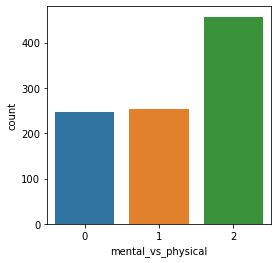

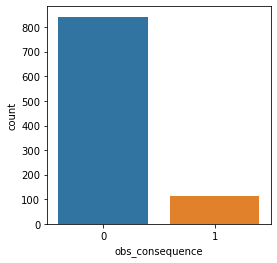

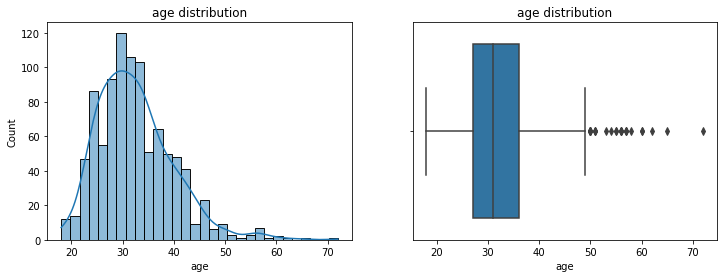

In [7]:
# countplots of categorical variables
# histograms and bosplots of continuous variables
explore.mental_health_univariate(encoded_df)

#### `Univariate 1st Iteration - Key Findings, Takeaways, and Next Steps`:

### Bivariate

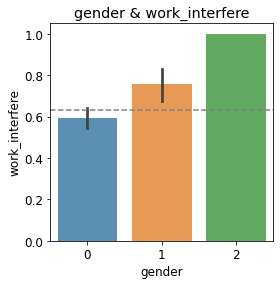


_____________________



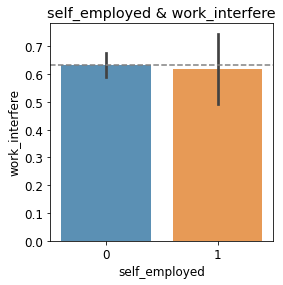


_____________________



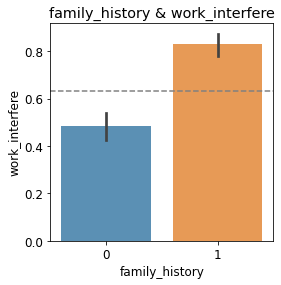


_____________________



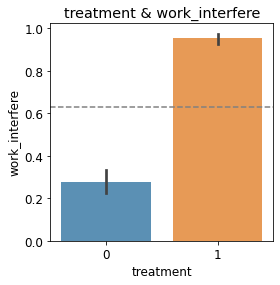


_____________________



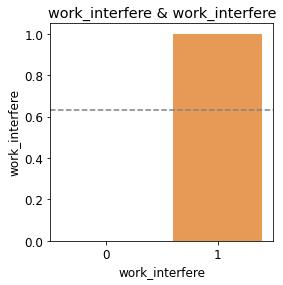


_____________________



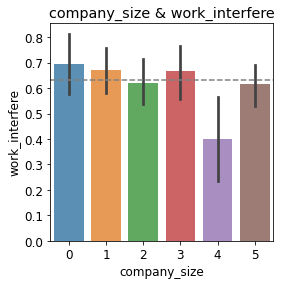


_____________________



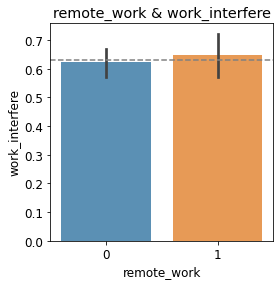


_____________________



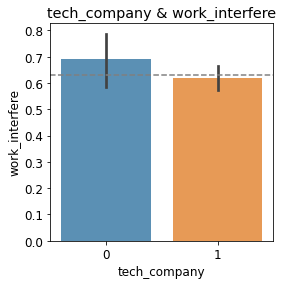


_____________________



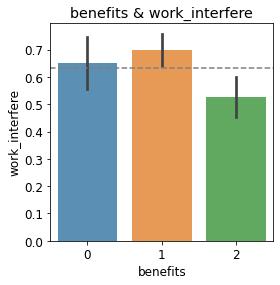


_____________________



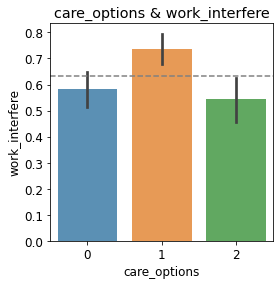


_____________________



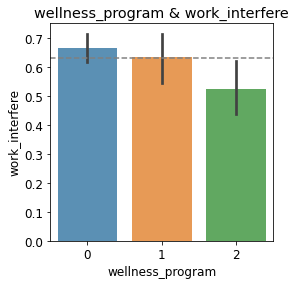


_____________________



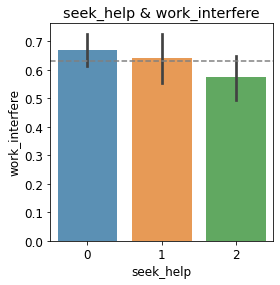


_____________________



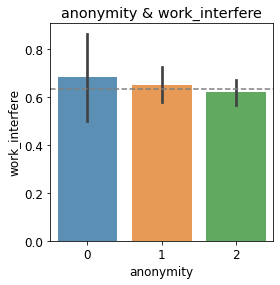


_____________________



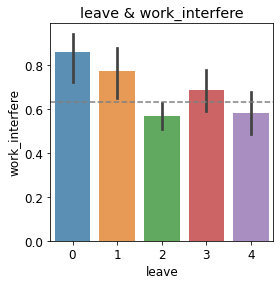


_____________________



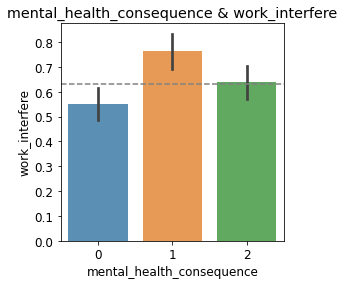


_____________________



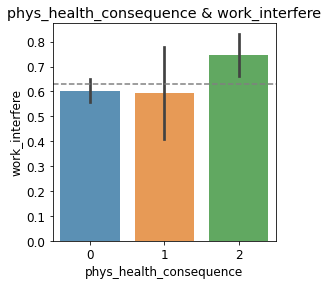


_____________________



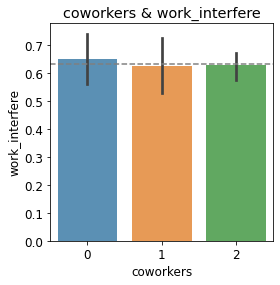


_____________________



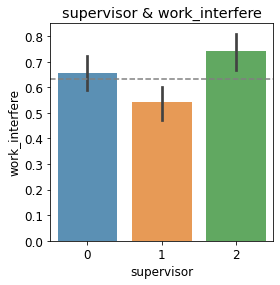


_____________________



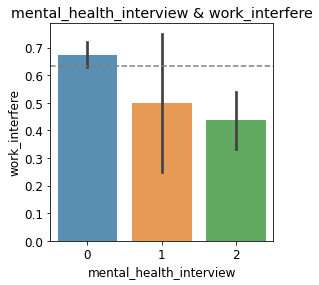


_____________________



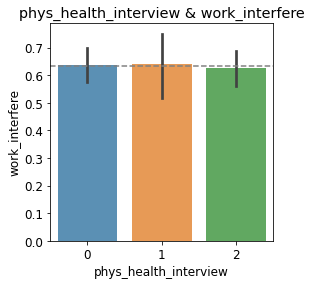


_____________________



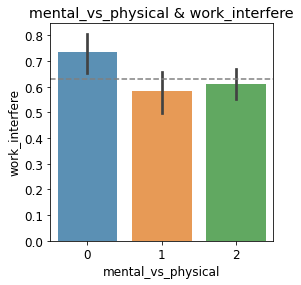


_____________________



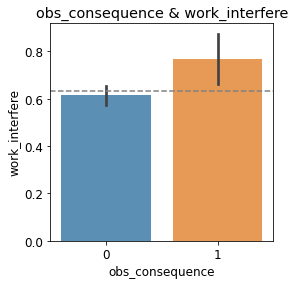


_____________________

age


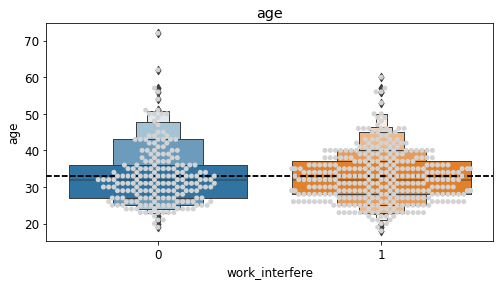

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                     variable    chi2  p-value  degrees of freedom
0              family_history   65.94   0.0000                 1.0
1                   treatment  258.60   0.0000                 1.0
2              work_interfere  530.71   0.0000                 1.0
3     mental_health_interview   18.51   0.0001                 2.0
4                care_options   16.16   0.0003                 2.0
5                  supervisor   15.60   0.0004                 2.0
6   mental_health_consequence   15.41   0.0005                 2.0
7                       leave   19.49   0.0006               

In [8]:
encoded_bi_metrics = explore.mental_health_bivariate(encoded_train, 'work_interfere')

#### Bivariate 1st Iteration - Key Findings, Takeaways, and Next Steps:

**Possible Strong Drivers (p-value <= 0.05, chi2 >)** 
- gender, family history, treatment, benefits, care options, wellness program, leave, mental health consequence, phys health consequence, supervisor, mental health interview, mental vs physical, obs consequence
- These variables all show 

**Worth Exploring Further**
- company size

**Further observations**
- Some of the values have a "dont know" column and they all are much less than yes or no. My theory is this is because people who need to access help or resources to get help probably looked into it because it was impacting work performance. 
        - companies larger than 1000 employees seem to have the least amount of impacts to work compared to the other sized companies
        - people who feel like their employer does not consider mental health to be similar to physical health report higher rates of impact to work. 
        - Feeling comfortable talking to a supervisor also reduces the impact to work performance
        - percieving that one would be punished for mental health also had a higher rate of impact to work performance
        - observing negative consequences to others in the company hurts work performance
        - the easier it is to get leave the less impact to work performacne there is

### 2nd Iteration
The second iteration will be performed on the one-hot encoded data, before deciding what other feature engineering we would like to perform before the third iteration of data exploration.

In [9]:
# one-hot encode the data
hot_df = explore.one_hot(encoded_df)

In [10]:
# split the one-hot encoded data
hot_train, hot_validate, hot_test = explore.three_split(hot_df, 'work_interfere')

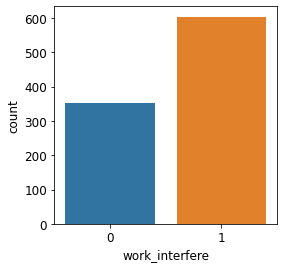

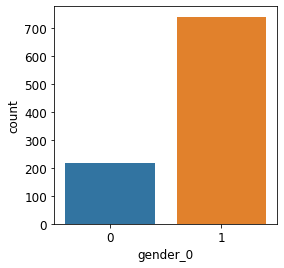

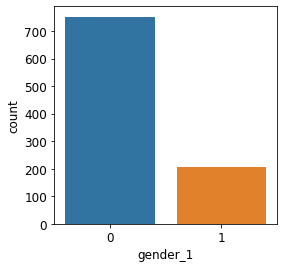

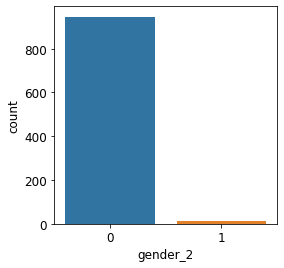

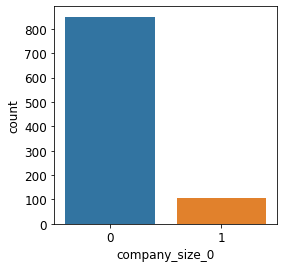

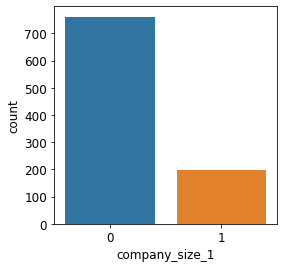

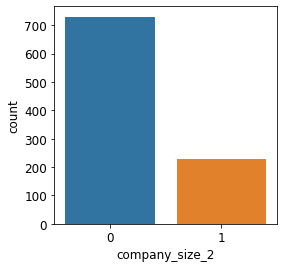

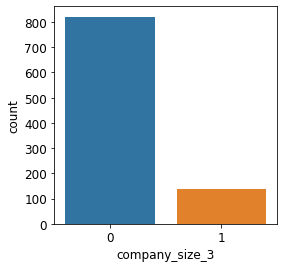

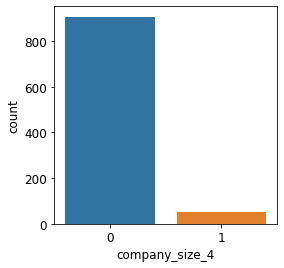

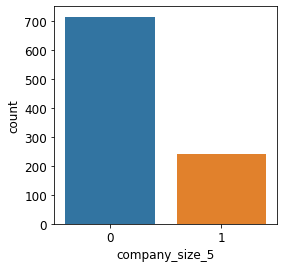

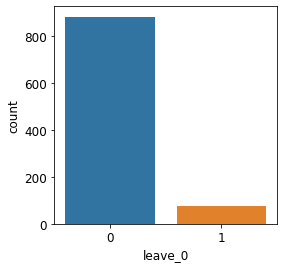

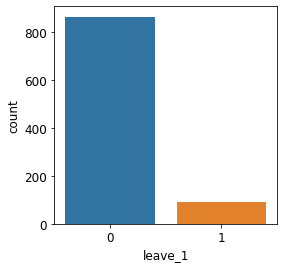

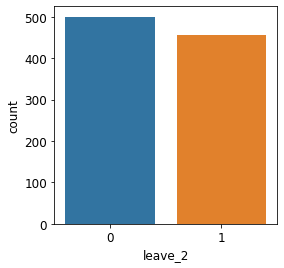

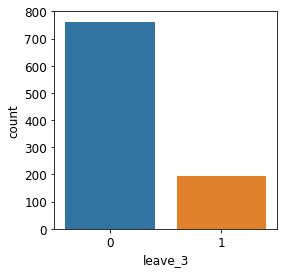

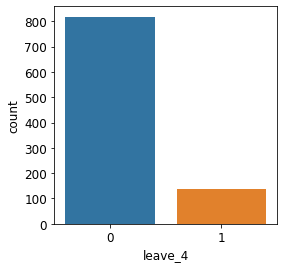

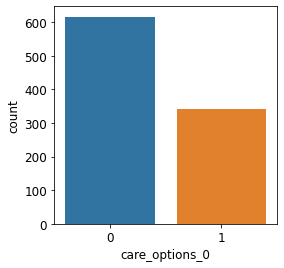

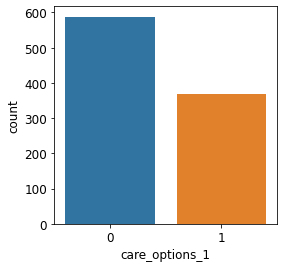

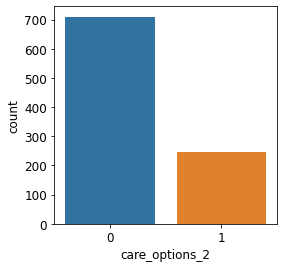

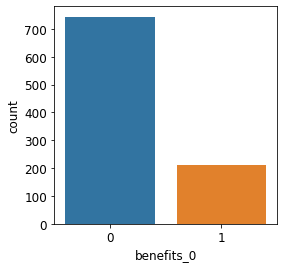

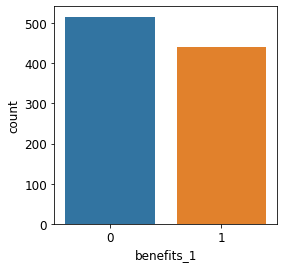

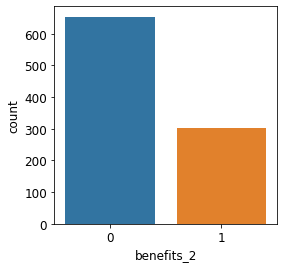

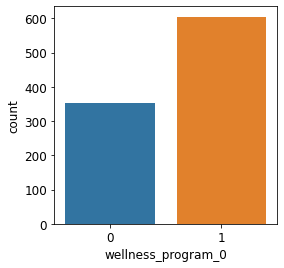

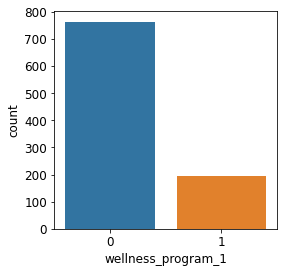

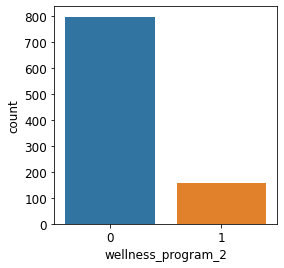

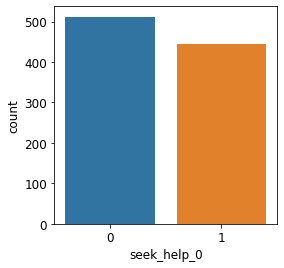

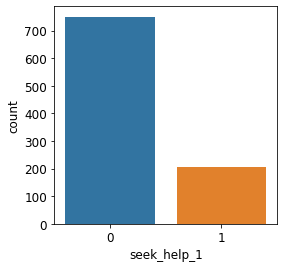

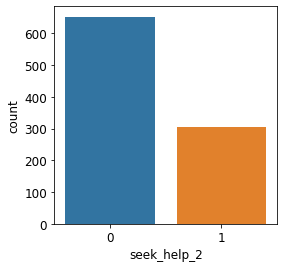

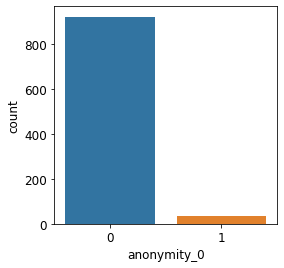

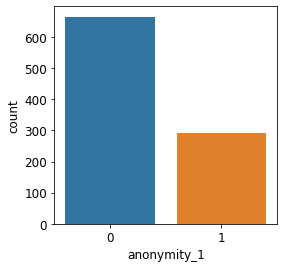

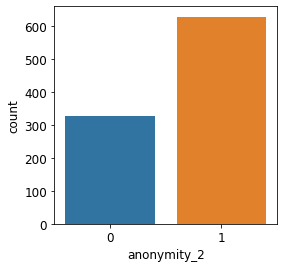

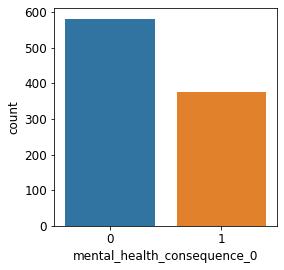

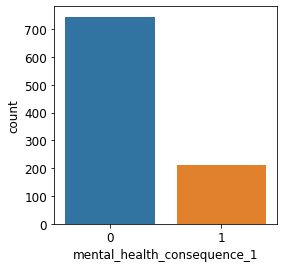

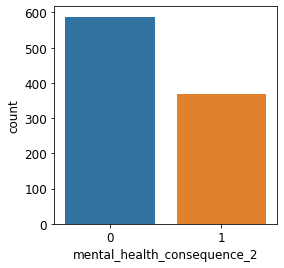

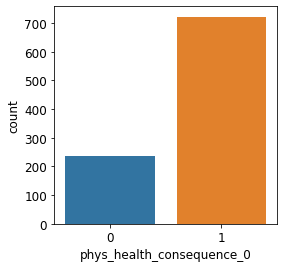

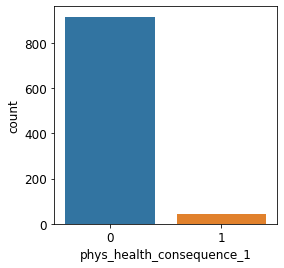

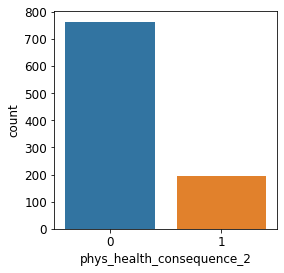

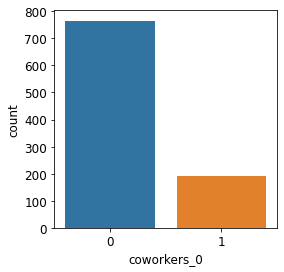

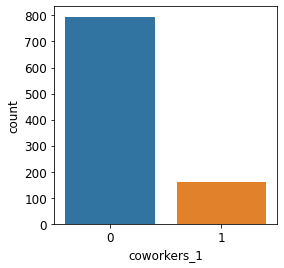

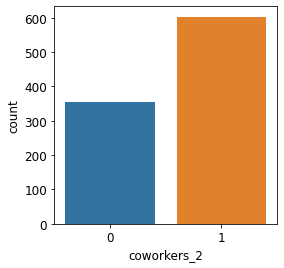

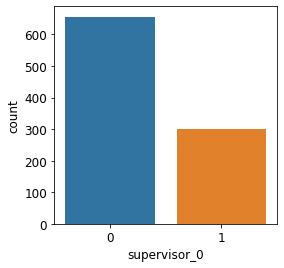

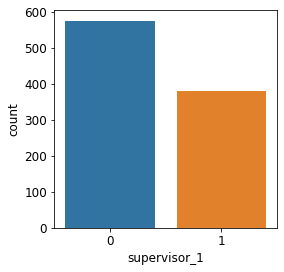

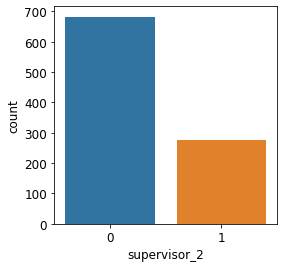

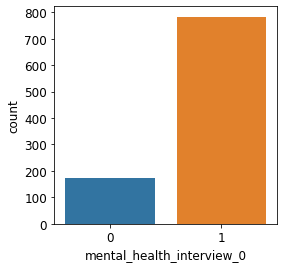

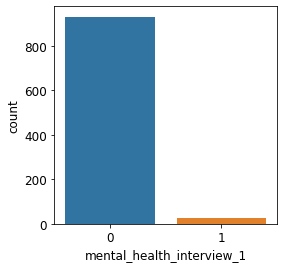

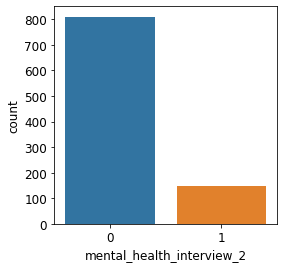

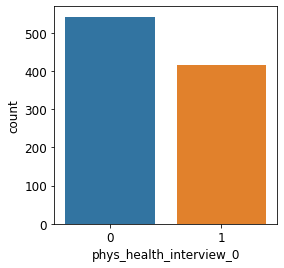

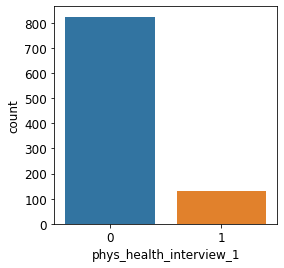

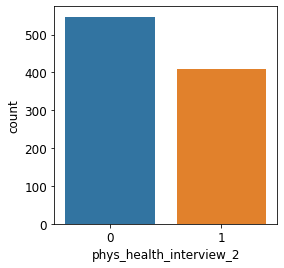

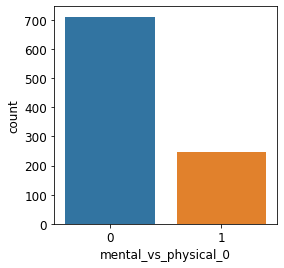

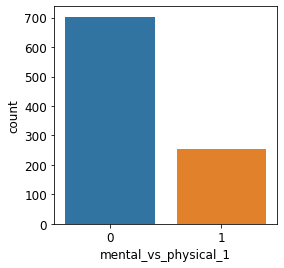

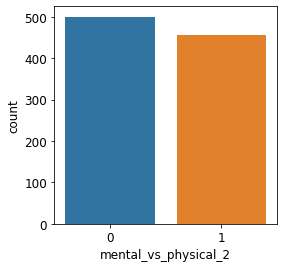

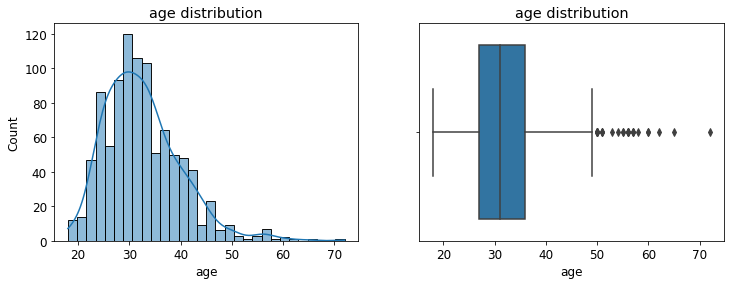

In [11]:
# univariate exploration on one-hot encoded data

explore.mental_health_univariate(hot_df)

#### Univariate 2nd Iteration - Key Findings, Takeaways, and Next Steps:

### Bivariate

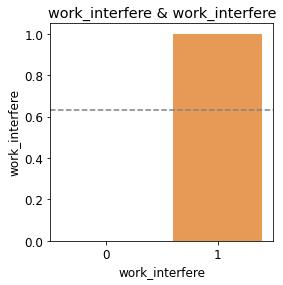


_____________________



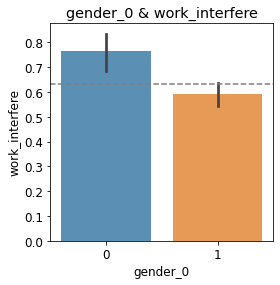


_____________________



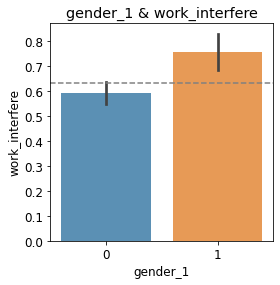


_____________________



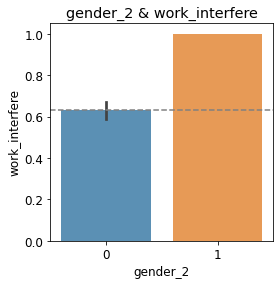


_____________________



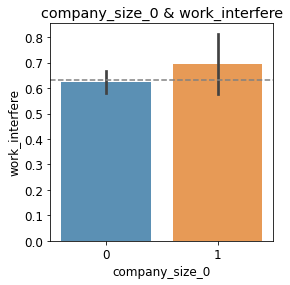


_____________________



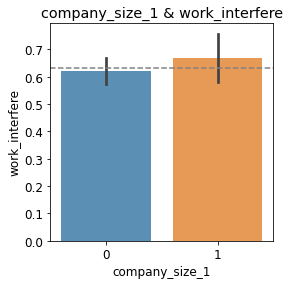


_____________________



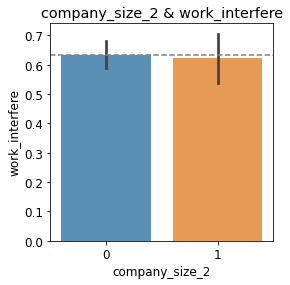


_____________________



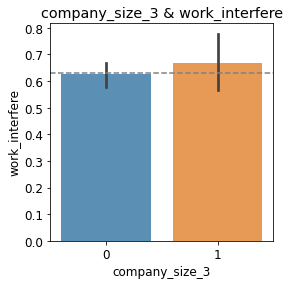


_____________________



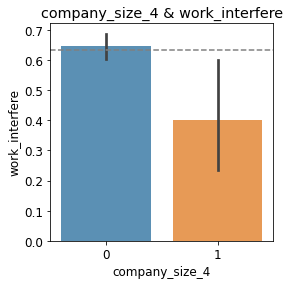


_____________________



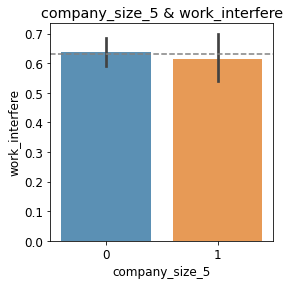


_____________________



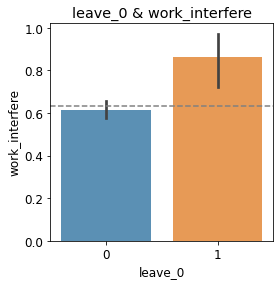


_____________________



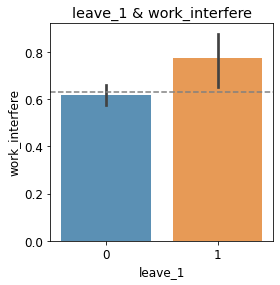


_____________________



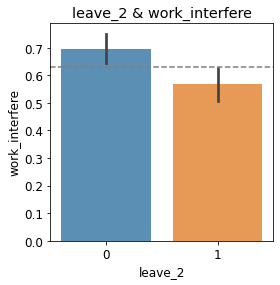


_____________________



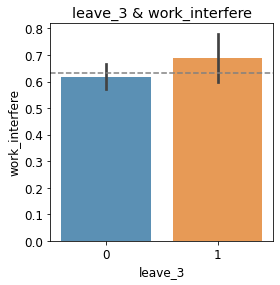


_____________________



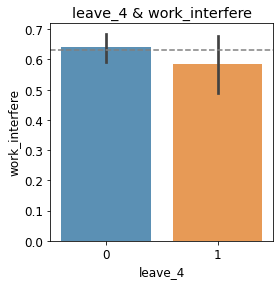


_____________________



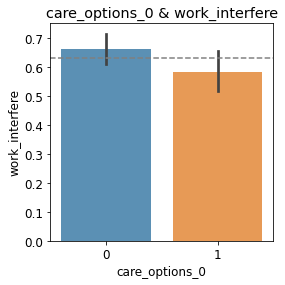


_____________________



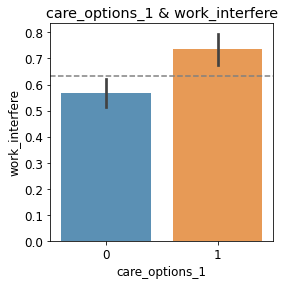


_____________________



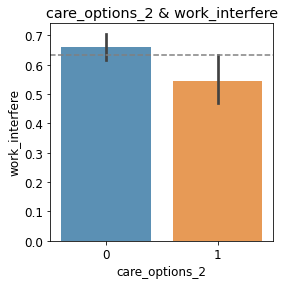


_____________________



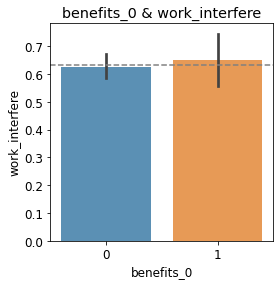


_____________________



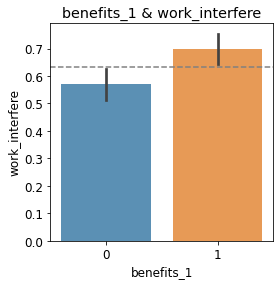


_____________________



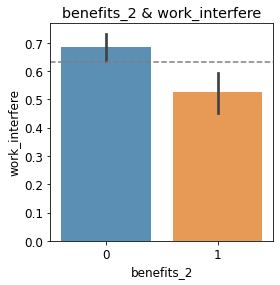


_____________________



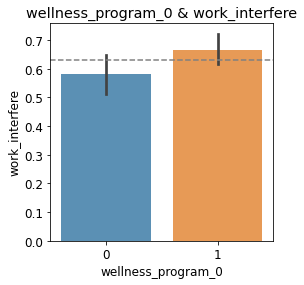


_____________________



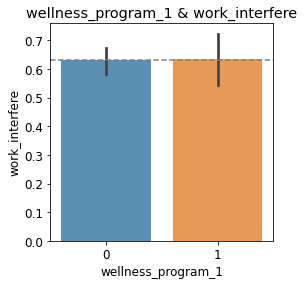


_____________________



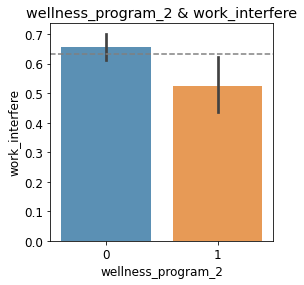


_____________________



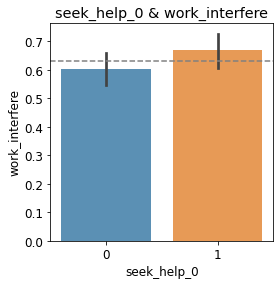


_____________________



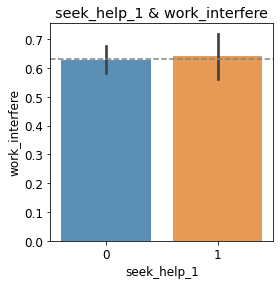


_____________________



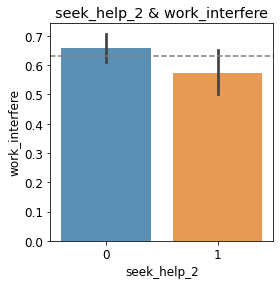


_____________________



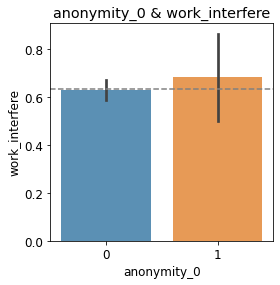


_____________________



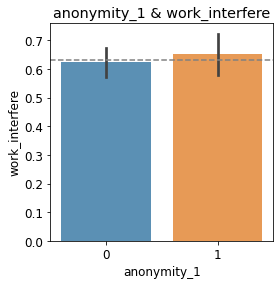


_____________________



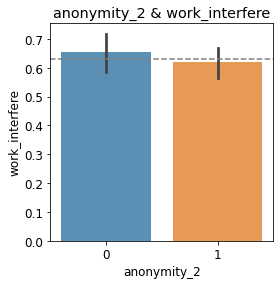


_____________________



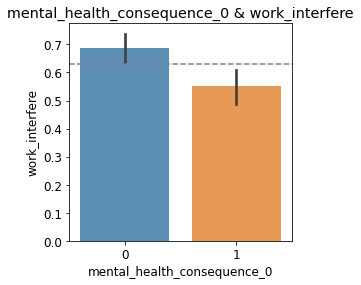


_____________________



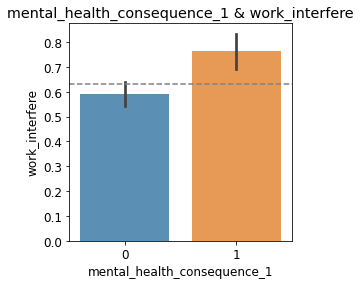


_____________________



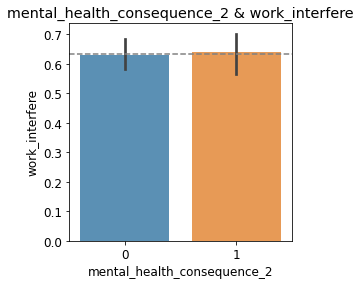


_____________________



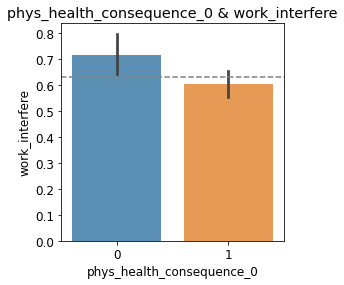


_____________________



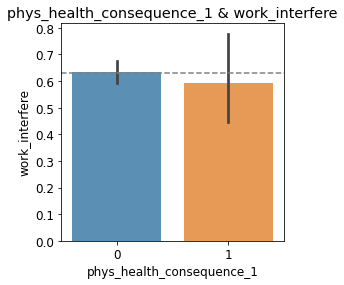


_____________________



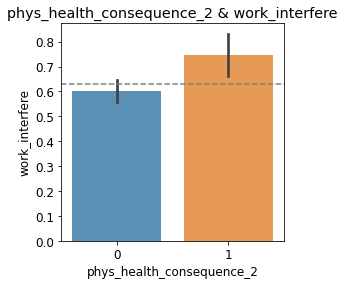


_____________________



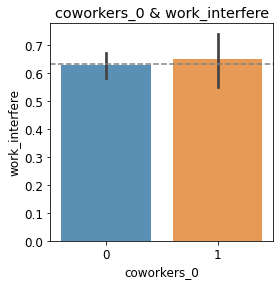


_____________________



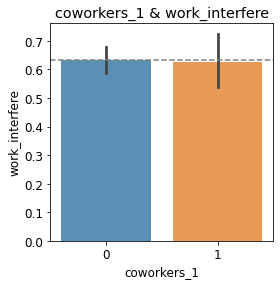


_____________________



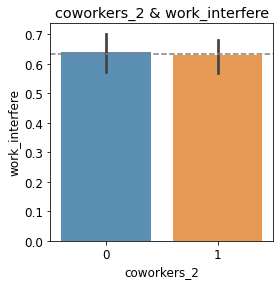


_____________________



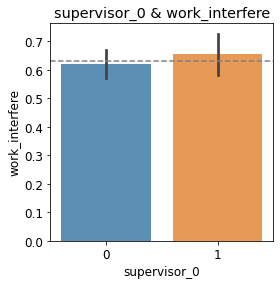


_____________________



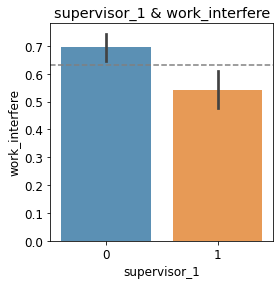


_____________________



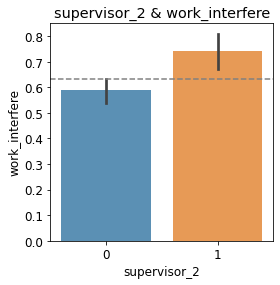


_____________________



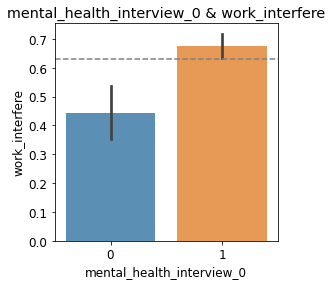


_____________________



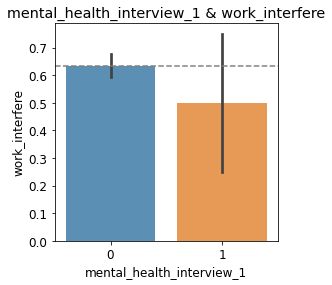


_____________________



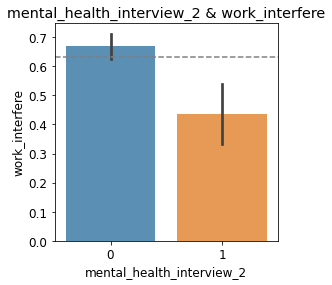


_____________________



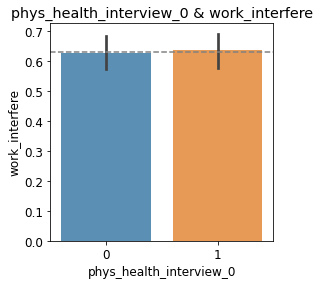


_____________________



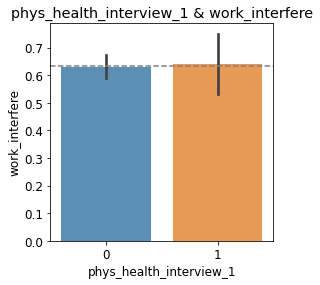


_____________________



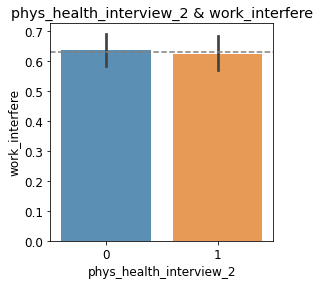


_____________________



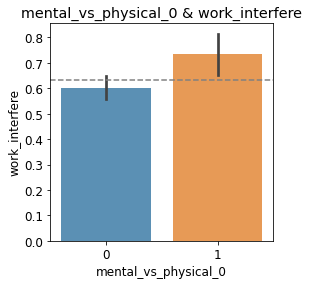


_____________________



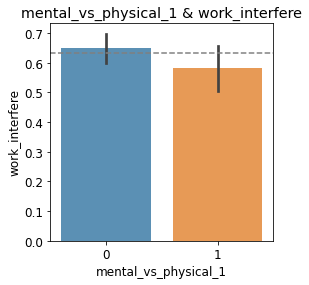


_____________________



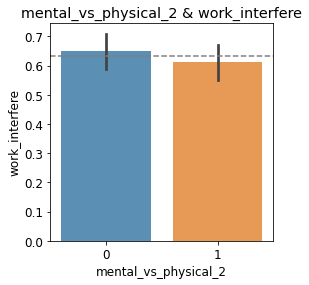


_____________________

age


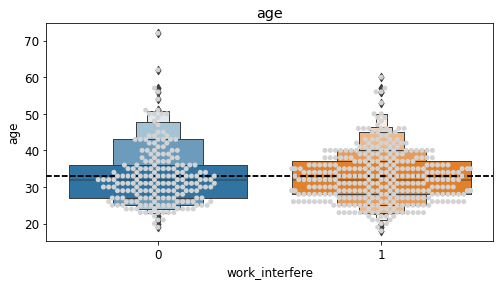

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                       variable    chi2  p-value  degrees of freedom
0                work_interfere  530.71   0.0000                 1.0
1     mental_health_interview_0   17.35   0.0000                 1.0
2     mental_health_interview_2   15.99   0.0001                 1.0
3                care_options_1   14.97   0.0001                 1.0
4                  supervisor_1   12.42   0.0004                 1.0
5                    benefits_2   12.19   0.0005                 1.0
6                      gender_0   11.74   0.0006                 1.0
7   mental_health_consequence_1   11.28   0.0

In [12]:
hot_bi_metrics = explore.mental_health_bivariate(hot_train, 'work_interfere')

### Multivariate

#### Multivariate - Key Findings, Takeaways, and Next Steps:

### Hypothesis Testing
#### Target Variable: 'work_interfere'

#### Hypothesis 1: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

In [ ]:
# Here is the work for hypothesis 1

#### Hypothesis 1 - Key Findings, Takeaways, and Next Steps:
- [insert hypothesis here]
- [reject or fail to reject the null]

#### Hypothesis 2: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

In [ ]:
# Here is the work for hypothesis 2

#### Hypothesis 2 - Key Findings, Takeaways, and Next Steps:
- [insert hypothesis here]
- [reject or fail to reject the null]

#### Hypothesis 3: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

In [ ]:
# Here is the work for hypothesis 3

#### Hypothesis 3 - Key Findings, Takeaways, and Next Steps:
- [insert hypothesis here]
- [reject or fail to reject the null]

#### Hypothesis 4: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 5: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 6: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 7: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 8: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 9: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 10: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

------

### Explore Key Findings, Takeaways, and Next Steps:

------

## Modeling

### Initital Setup

### Model 1: [insert model name here]

#### Model 1: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 2: [insert model name here]

#### Model 2: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 3: [insert model name here]

#### Model 3: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 4: [insert model name here]

#### Model 4: [insert model name here] - Key Findings, Takeaways, and Next Steps:

------

### Modeling Key Findings, Takeaways, and Next Steps:

------

### Summary - Key Findings, Takeaways, and Next Steps:

------